In [1]:
import sys
import os
import matplotlib.pyplot as plt
import cv2

import numpy as np

# Add the src directory to the path. TEMPORARY FIX
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.data_processing.dataset_loader import CoastData
from src.data_processing.dataset_preprocessor_bilstm import DatasetPreprocessorBiLSTM

In [6]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/raw/"))

# Load the data, all the different stations
data = CoastData(data_path, name="global")

filtered_data = data.get_images_and_masks() 

print(filtered_data)

# filtered_data = data.split_data()

# Get the first image and mask
index = 1
image_path = filtered_data[index]['image']
mask_path = filtered_data[index]['mask']

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: global - 1717 images
[{'image': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\images\\1548260289.Wed.Jan.23_17_18_09.CET.2019.agrelo.image.jpg', 'mask': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\masks\\1548260289.Wed.Jan.23_17_18_09.CET.2019.agrelo.mask.png'}, {'image': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\images\\1548430860.Fri.Jan.25_16_41_00.CET.2019.agrelo.image.jpg', 'mask': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\masks\\1548430860.Fri.Jan.25_16_41_00.CET.2019.agrelo.mask.png'}, {'image': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\images\\1548520320.Sat.Jan.26_17_32_00.CET.2019.agrelo.image.jpg', 'mask': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\masks\\1548520320.Sat.Jan.26_17_32_00.CET.2019.agrelo.mask.png'}, {'image': 'c:\\Users\\josep\\Documents\\SOCIB\\Shoreline-extraction\\data\\raw\\images\\154852

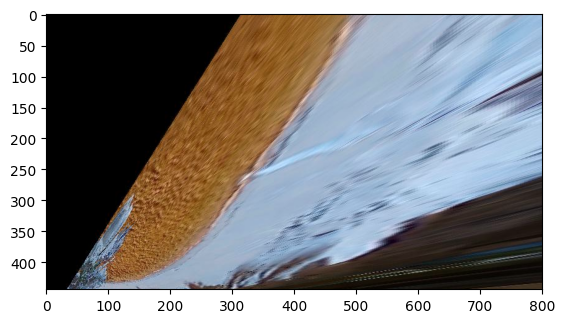

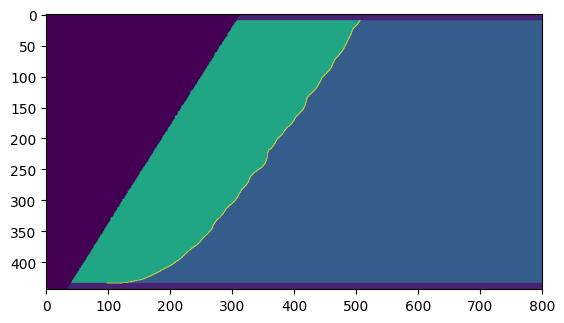

In [7]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

Image shape: (444, 801, 3)
Mask shape: (444, 801)
(array([0, 1, 2], dtype=uint8), array([ 76889, 189097,  56254]))
(array([0, 1], dtype=uint8), array([133143, 189097]))


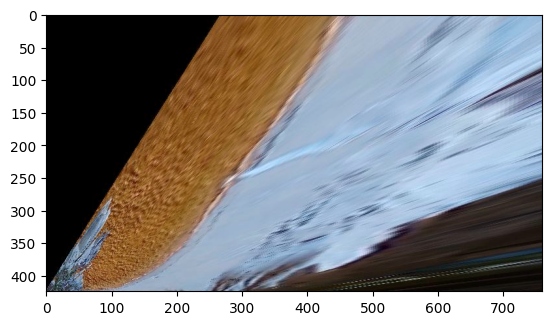

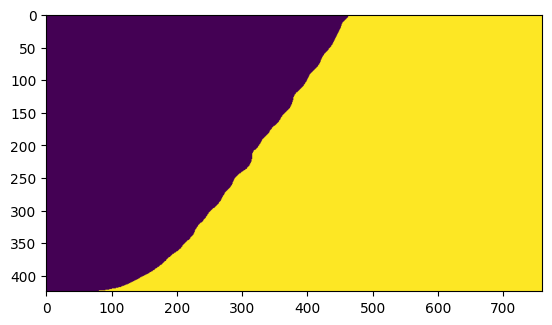

In [8]:
dataset_preprocessor_bilstm = DatasetPreprocessorBiLSTM()

image = dataset_preprocessor_bilstm.load_image(image_path)
mask = dataset_preprocessor_bilstm.load_mask(mask_path)

print("Image shape:", image.shape)
print("Mask shape:", mask.shape)

mapping = {
    0: 2,    # Background → Class 2 (after the mapping, we will transform it to binary)
    25: 2,   # Not classified → Class 2 (after the mapping, we will transform it to binary)
    75: 1,   # Land → Class 2
    150: 0,  # Sea → Class 3
    255: 1   # Shoreline → Class 4
}

new_image, new_mask = dataset_preprocessor_bilstm.process_image(image, mask, mask_mapping=mapping)

plt.imshow(new_image)
plt.show()  

plt.imshow(new_mask)
plt.show()

In [9]:
new_data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_bilstm_global/"))
dataset_preprocessor_bilstm.preprocess_from_metadata(metadata=data.metadata, dataset_path=filtered_data, dataset_output_path=new_data_path, mask_mapping=mapping)

(array([0, 1, 2], dtype=uint8), array([ 61082, 145511,  28607]))
(array([0, 1], dtype=uint8), array([ 89689, 145511]))
(array([0, 1, 2], dtype=uint8), array([ 76889, 189097,  56254]))
(array([0, 1], dtype=uint8), array([133143, 189097]))
(array([0, 1, 2], dtype=uint8), array([ 85860, 178182,  56339]))
(array([0, 1], dtype=uint8), array([142199, 178182]))
(array([0, 1, 2], dtype=uint8), array([ 84462, 182458,  57600]))
(array([0, 1], dtype=uint8), array([142062, 182458]))
(array([0, 1, 2], dtype=uint8), array([ 88931, 175527,  55239]))
(array([0, 1], dtype=uint8), array([144165, 175532]))
(array([0, 1, 2], dtype=uint8), array([ 77887, 181851,  54680]))
(array([0, 1], dtype=uint8), array([132567, 181851]))
(array([0, 1, 2], dtype=uint8), array([ 90361, 157090,  46653]))
(array([0, 1], dtype=uint8), array([136999, 157105]))
(array([0, 1, 2], dtype=uint8), array([ 94801, 162686,  50361]))
(array([0, 1], dtype=uint8), array([145129, 162719]))
(array([0, 1, 2], dtype=uint8), array([ 83237, 1

In [12]:
data_path = os.path.abspath(os.path.join(os.getcwd(), "../../data/processed_bilstm_arenaldentem/"))

# Load the data, all the different stations
data = CoastData(data_path, name="arenaldentem")

filtered_data = data.get_images_and_masks() 

print(filtered_data)

# filtered_data = data.split_data()

# Get the first image and mask
index = 2
image_path = filtered_data[index]['image']
mask_path = filtered_data[index]['mask']

print("Image:", image_path)
print("Mask:", mask_path)

CoastData: arenaldentem - 40 images
[{'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1661756929.Mon.Aug.29_08_08_49.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1661756929.Mon.Aug.29_08_08_49.CET.2022.arenaldentem.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1663582740.Mon.Sep.19_11_19_00.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1663582740.Mon.Sep.19_11_19_00.CET.2022.arenaldentem.mask.png'}, {'image': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/images/1664092920.Sun.Sep.25_09_02_00.CET.2022.arenaldentem.image.jpg', 'mask': '/Users/josep/Documents/SOCIB/Shoreline-extraction/data/processed_bilstm_arenaldentem/masks/1664092920.Sun.Sep.25_09_02_0

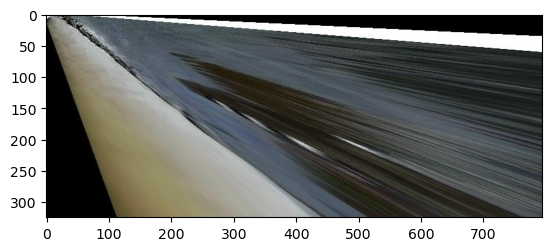

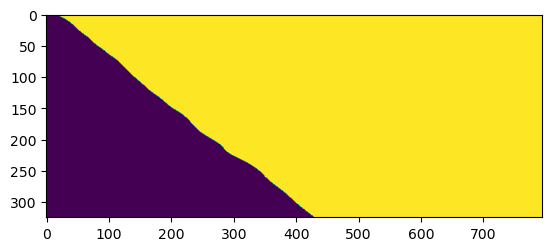

In [13]:
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)